In [ ]:



























































































































































































































































































































































































































































































import time
!pip install -q pyomo
#Below snip of code install the GLPK solver into current python session
!apt-get install -y -qq glpk-utils
from pyomo.environ import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

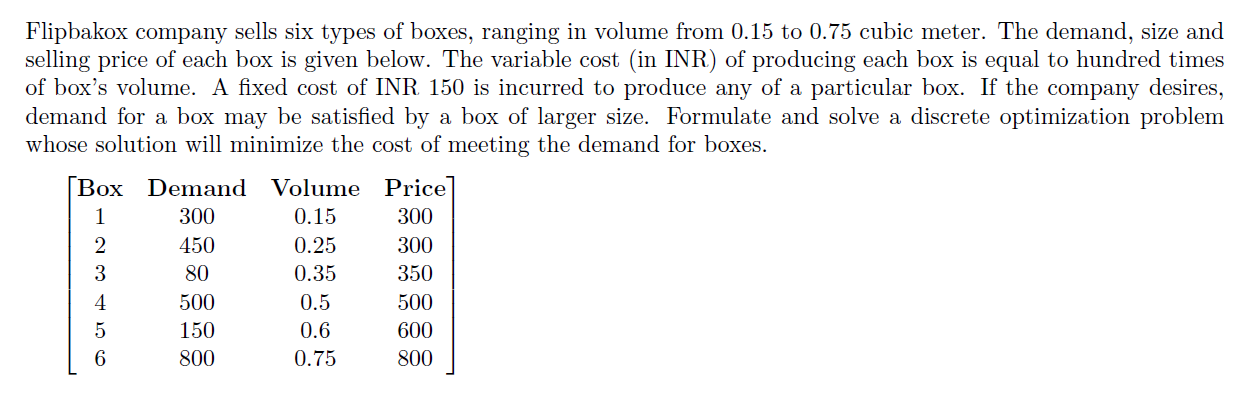

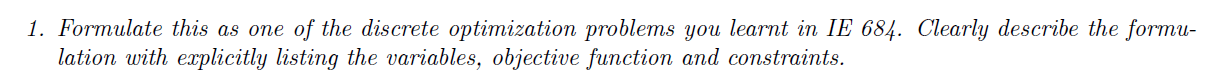

Let $x_i $ denotes the number of boxes of type $i $ produced. This can be an Non Negative integer. $x_i \in \mathbf{N} \cup \{0\}$

Let $y_i $ is a binary variable indicating whether any boxes of type $i$ are produced. $y_i = 1 $ if $x_i > 0 $, and $y_i = 0 $ otherwise.

This constraint can be enforced using big M method. Meaning,

$$x_i \leq M \cdot y_i \quad \text{for } i = 1, 2, \ldots, 6 $$

Where $M$ is sufficiently large.

Let $v_i$ be volume of box type $i$. Then the objective function, will become:

$$ minimize \quad \sum_{i=1}^{6} \left(1500 \cdot y_i + 100 \cdot v_i \cdot x_i \right)$$

The constraint including the bigM method:

1. The demand should be met. If the company desires,
demand for a box may be satisfied by a box of larger size. This means that for $i < j$ demand for box $i$ can be fullfilled using the variable $x_j$. Hence the constraints becomes:

$$\sum_{j=i}^{6}x_j \geq d_i \quad \forall i  = 1,2,3,...6$$
where $d_i$ is demand for box of type $i$

2. $$x_i \leq M \cdot y_i \quad \text{for } i = 1, 2, \ldots, 6 $$

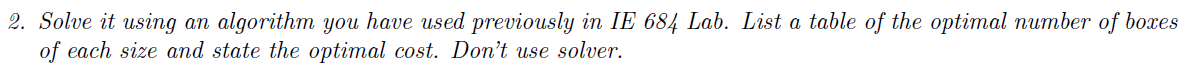

In [ ]:
def min_cost_to_meet_demand(demand, volume):
    n = len(demand)
    max_demand = max(demand)

    # Initialize a table to store the minimum cost required to meet demands
    dp = np.full((n+1, max_demand+1), np.inf)
    dp[0, 0] = 0  # Base case: no cost to meet zero demand

    # Iterate over each type of box
    for i in range(1, n+1):
        # Iterate over each possible demand
        for j in range(max_demand+1):
            # Option 1: Don't produce box of type i
            dp[i, j] = min(dp[i, j], dp[i-1, j])
            # Option 2: Produce box of type i if demand can be met
            if j >= demand[i-1]:
                dp[i, j] = min(dp[i, j], dp[i, j-demand[i-1]] + 1500 + 100 * volume[i-1])

    return dp[n, max_demand]

# Demand and other parameters
demand = [300, 450, 80, 500, 150, 800]
volume = [0.15, 0.25, 0.35, 0.5, 0.6, 0.75]

# Compute the minimum cost to meet demands
min_cost = min_cost_to_meet_demand(demand, volume)

# Print the result
print("Minimum cost to meet demands:", min_cost)


# Compute the minimum cost to meet demands
dp = min_cost_to_meet_demand(demand, volume)



Minimum cost to meet demands: 1575.0


In [ ]:
dp

1575.0

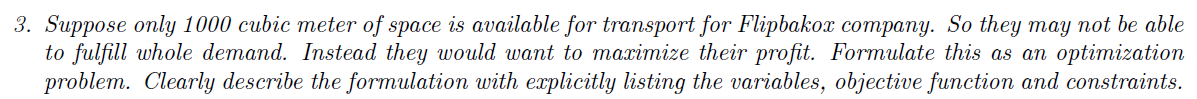

Let $x_i $ denotes the number of boxes of type $i $ produced. This can be an Non Negative integer. $x_i \in \mathbf{N} \cup \{0\}$

Let $y_i $ is a binary variable indicating whether any boxes of type $i$ are produced. $y_i = 1 $ if $x_i > 0 $, and $y_i = 0 $ otherwise.

Let $p_i$ be the price of the product $x_i$.

This constraint can be enforced using big M method. Meaning,

$$x_i \leq M \cdot y_i \quad \text{for } i = 1, 2, \ldots, 6 $$

Where $M$ is sufficiently large.

Let $v_i$ be volume of box type $i$. Then the objective function, will become to maximize profit which is Price - Cost of Making:

$$ maximize \quad \sum_{i=1}^{6} \left(p_i \cdot x_i - (1500 \cdot y_i + 100 \cdot v_i \cdot x_i \right))$$

$$ maximize \quad \sum_{i=1}^{6} (p_i -100 \cdot  v_i) \cdot x_i - (1500 \cdot y_i )$$

The constraint including the bigM method:

1. The max volume will be 1000.

$$\sum_{j=1}^{6}x_j \cdot v_j \leq 1000 \quad $$


2. $$x_i \leq M \cdot y_i \quad \text{for } i = 1, 2, \ldots, 6 $$

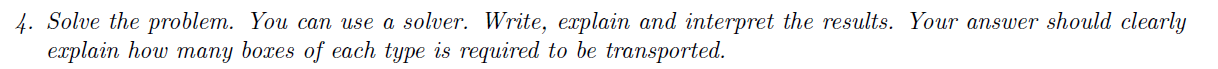

In [ ]:
demand = [300, 450, 80, 500, 150, 800]
volume = [0.15, 0.25, 0.35, 0.5, 0.6, 0.75]
price = [300, 300, 350, 500, 600, 800]
M = 10000000000

In [ ]:
model = ConcreteModel()
model.x = Var(range(6), domain = NonNegativeIntegers)
model.y = Var(range(6), domain = Binary)
model.obj = Objective(expr = sum(( (price[i] - 100*volume[i])*model.x[i] - 1500*model.y[i] )for i in range(6)), sense = maximize)

model.constraints = ConstraintList()
model.constraints.add(expr = sum(model.x[i]*volume[i] for i in range(6)) <= 1000)
for i in range(6):
  model.constraints.add(expr = model.x[i] <= M*model.y[i])

result = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model)
model.pprint()

2 Var Declarations
    x : Size=6, Index={0, 1, 2, 3, 4, 5}
        Key : Lower : Value  : Upper : Fixed : Stale : Domain
          0 :     0 : 6666.0 :  None : False : False : NonNegativeIntegers
          1 :     0 :    0.0 :  None : False : False : NonNegativeIntegers
          2 :     0 :    0.0 :  None : False : False : NonNegativeIntegers
          3 :     0 :    0.0 :  None : False : False : NonNegativeIntegers
          4 :     0 :    0.0 :  None : False : False : NonNegativeIntegers
          5 :     0 :    0.0 :  None : False : False : NonNegativeIntegers
    y : Size=6, Index={0, 1, 2, 3, 4, 5}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   1.0 :     1 : False : False : Binary
          1 :     0 :   0.0 :     1 : False : False : Binary
          2 :     0 :   0.0 :     1 : False : False : Binary
          3 :     0 :   0.0 :     1 : False : False : Binary
          4 :     0 :   0.0 :     1 : False : False : Binary
          5 :     0 :

In [ ]:
result.solver.termination_condition

<TerminationCondition.optimal: 'optimal'>

In [ ]:
result.solver.status

<SolverStatus.ok: 'ok'>

In [ ]:
print("Total maximum profit gained by boxes chosen is: ", model.obj())

Total maximum profit gained by boxes chosen is:  1898310.0


In [ ]:
#values of variables
try:
  print('Decision Variables for our model : ')
  for i in range(6):
    print(f'x{i} : ', model.x[i].value)
except:
  print("Problem has  Other than Optimal.")

Decision Variables for our model : 
x0 :  6666.0
x1 :  0.0
x2 :  0.0
x3 :  0.0
x4 :  0.0
x5 :  0.0


This is obvious. Since we are constrained by volume only, we can calculate the profit/volume ratio. This will prefer building boxes that have lower volume and higher profits.

$$
\begin{array}{ccc}
\text{Profit per box} & \text{Total boxes possible (1000/$v_i$)} & \text{Profit (-Fixed Cost Also)} \\
285 & 6666.66 & 1898310\\
275 & 1200 &   328500 \\
315 & 2857 &   898455 \\
450 & 2000 &   898500   \\
540 & 1666.66 &  898140\\
725 & 1333.33 & 964925
\end{array}
$$

This says we need to choose box 1 only